## EDA

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data_delay = pd.read_csv('data/get_around_delay_analysis.csv')
data_pricing = pd.read_csv('data/get_around_pricing_project.csv')

### 1. Delay

In [3]:
data_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,Unnamed: 7,Unnamed: 8
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN


In [4]:
df_delay = data_delay.copy()

In [5]:
# Deleting Unnamed columns
df_delay.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [6]:
df_delay.shape

(21310, 7)

In [7]:
df_delay.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


delay_at_checkout_in_minutes show us the difference in minutes between the rental end time that the driver has chosen at the time of booking and the real time the driver completed the checkout. In this column we can see that the "max" value is 71084 minutes late which is almost 50 days... Same for the "min" value : - 22433 means that the driver return the car 15 days in advance.

Lot of missing values in this column too, it could be interesting to see if the NaN values represent the 0 value which means that the driver has returned the car on time. 

For missing values in previous_ended_rental_id it only means that there was no previous rental or the delay was higher than 12 hours. 

For missing values in time_delta_with_previous_rental_in_minutes, it means that the difference in minutes between two rentals was higher than 12 hours.

Some outliers and necessary to check missing values in delay_at_checkout_in_minutes

In [8]:
# Checking missing values
df_delay.isna().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [9]:
df_zero = df_delay[df_delay['delay_at_checkout_in_minutes'] == 0]
df_zero

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
314,550660,399967,mobile,ended,0.0,NaN,NaN
576,531451,378003,mobile,ended,0.0,NaN,NaN
583,532695,320824,connect,ended,0.0,NaN,NaN
810,529269,361156,mobile,ended,0.0,NaN,NaN
1337,540574,408117,mobile,ended,0.0,NaN,NaN
...,...,...,...,...,...,...,...
20402,566064,267977,mobile,ended,0.0,NaN,NaN
21006,559537,209458,mobile,ended,0.0,NaN,NaN
21008,559676,232442,mobile,ended,0.0,NaN,NaN
21186,567477,362507,connect,ended,0.0,NaN,NaN


It seems that NaN values in the "delay..." column are real missing values 

In [10]:
print(df_delay['state'].value_counts())
print()
print(df_delay['checkin_type'].value_counts())

state
ended       18045
canceled     3265
Name: count, dtype: int64

checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64


In [11]:
delay_checkout = []
for delay in df_delay['delay_at_checkout_in_minutes']:
    if delay < 0:
        delay_checkout.append('Early')
    elif delay < 15:
        delay_checkout.append('Late 0-15')
    elif delay < 30:
        delay_checkout.append('Late 15-30')
    elif delay < 60:
        delay_checkout.append('Late 30-60')
    elif delay < 120:
        delay_checkout.append('Late 60-120')
    elif delay >= 120:
        delay_checkout.append('Very late')
    else:
        delay_checkout.append('NA')
    
df_delay['delay'] = delay_checkout
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NA
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early
2,508131,359049,connect,ended,70.0,NaN,NaN,Late 60-120
3,508865,299063,connect,canceled,NaN,NaN,NaN,NA
4,511440,313932,mobile,ended,NaN,NaN,NaN,NA


To remove outliers I decide to delete all rentals checked out more than one day late and rentals checked out more than one day early. 

In [12]:
outliers = df_delay[(df_delay['delay_at_checkout_in_minutes'] > 1440) | (df_delay['delay_at_checkout_in_minutes'] < -1440)]
outliers

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay
24,521191,224745,mobile,ended,1452.0,NaN,NaN,Very late
102,537082,359641,mobile,ended,1967.0,NaN,NaN,Very late
114,538012,192803,mobile,ended,3233.0,NaN,NaN,Very late
153,540733,393558,mobile,ended,15422.0,NaN,NaN,Very late
574,530971,241568,mobile,ended,3371.0,NaN,NaN,Very late
...,...,...,...,...,...,...,...,...
20947,554377,318954,mobile,ended,-1468.0,NaN,NaN,Early
21002,559126,379544,mobile,canceled,-17468.0,NaN,NaN,Early
21101,565287,415234,mobile,ended,2824.0,NaN,NaN,Very late
21104,565590,397046,mobile,ended,1728.0,NaN,NaN,Very late


In [13]:
df_delay = df_delay.drop(outliers.index)
df_delay.shape

(21081, 8)

In [14]:
df_delay['next_rental'] = [True if x > 0 else False for x in df_delay['previous_ended_rental_id']]
df_delay.drop(['previous_ended_rental_id'], axis=1, inplace=True)
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental
0,505000,363965,mobile,canceled,NaN,NaN,NA,False
1,507750,269550,mobile,ended,-81.0,NaN,Early,False
2,508131,359049,connect,ended,70.0,NaN,Late 60-120,False
3,508865,299063,connect,canceled,NaN,NaN,NA,False
4,511440,313932,mobile,ended,NaN,NaN,NA,False
...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,300.0,NA,True
21306,573790,341965,mobile,ended,-337.0,NaN,Early,False
21307,573791,364890,mobile,ended,144.0,NaN,Very late,False
21308,574852,362531,connect,ended,-76.0,NaN,Early,False


In [15]:
delta_time = []
for delta in df_delay['time_delta_with_previous_rental_in_minutes']:
    if delta == 0:
        delta_time.append('No time')
    elif delta < 30:
        delta_time.append('Less than 30 minutes')
    elif delta < 60:
        delta_time.append('One hour')
    elif delta < 120:
        delta_time.append('Between 1 and 2 hours')
    elif delta < 240:
        delta_time.append('4 hours')
    elif delta > 240:
        delta_time.append('More than 4 hours')
    else:
        delta_time.append('More than 12 hours')
    
df_delay['delta_time'] = delta_time
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental,delta_time
0,505000,363965,mobile,canceled,NaN,NaN,NA,False,More than 12 hours
1,507750,269550,mobile,ended,-81.0,NaN,Early,False,More than 12 hours
2,508131,359049,connect,ended,70.0,NaN,Late 60-120,False,More than 12 hours
3,508865,299063,connect,canceled,NaN,NaN,NA,False,More than 12 hours
4,511440,313932,mobile,ended,NaN,NaN,NA,False,More than 12 hours


In [16]:
df_delay['delta_time'].value_counts()

delta_time
More than 12 hours       19323
More than 4 hours          767
4 hours                    333
No time                    275
Between 1 and 2 hours      262
One hour                   121
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10,6))
px.histogram(df_delay, x='delta_time', color='checkin_type')

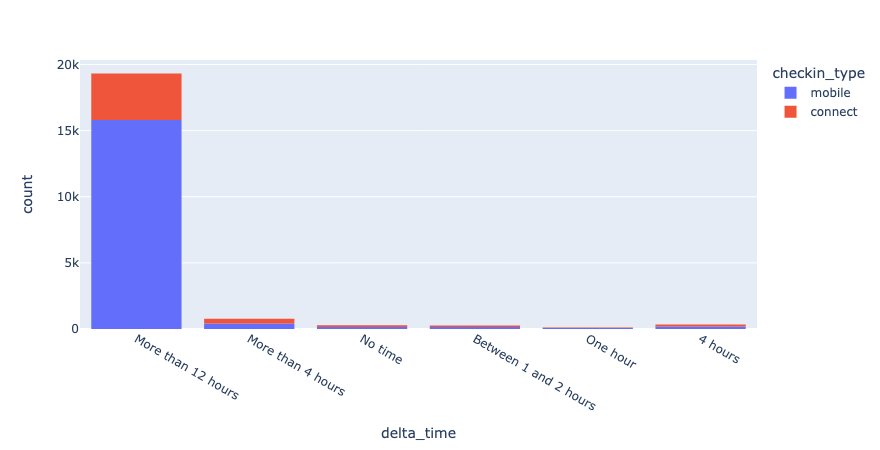

In [ ]:
plt.figure(figsize=(10,6))
px.histogram(df_delay, x='delay', color='checkin_type')

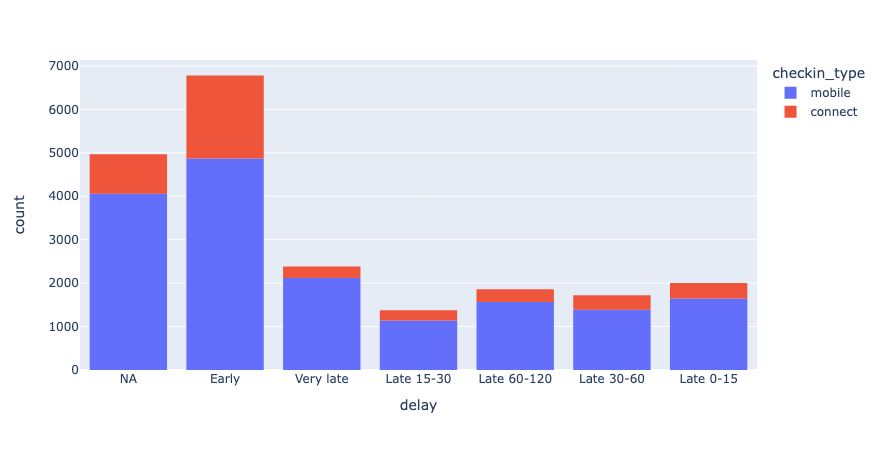

In [ ]:
plt.figure(figsize=(10,6))
px.histogram(df_delay, x='delay_at_checkout_in_minutes')

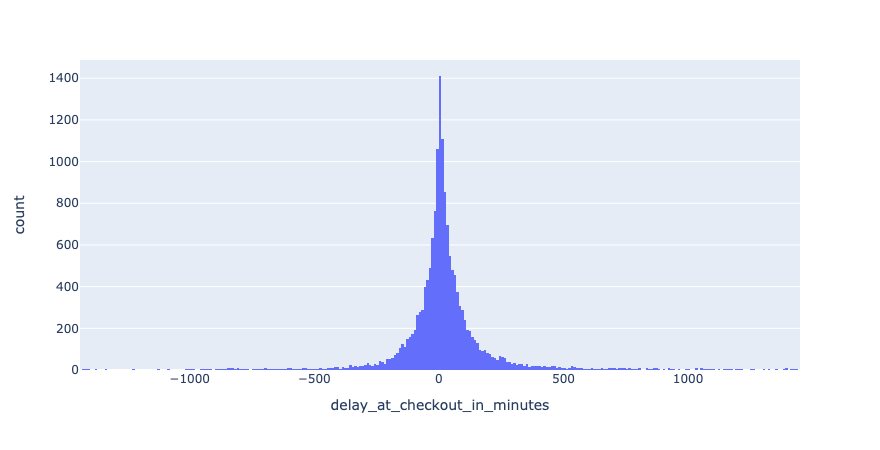

In [20]:
df_delay['difference_delay_delta'] = df_delay['delay_at_checkout_in_minutes'] - df_delay['time_delta_with_previous_rental_in_minutes']
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental,delta_time,difference_delay_delta
0,505000,363965,mobile,canceled,NaN,NaN,NA,False,More than 12 hours,NaN
1,507750,269550,mobile,ended,-81.0,NaN,Early,False,More than 12 hours,NaN
2,508131,359049,connect,ended,70.0,NaN,Late 60-120,False,More than 12 hours,NaN
3,508865,299063,connect,canceled,NaN,NaN,NA,False,More than 12 hours,NaN
4,511440,313932,mobile,ended,NaN,NaN,NA,False,More than 12 hours,NaN


In [ ]:
df_positive = df_delay[df_delay['difference_delay_delta'] >= 0]
df_negative = df_delay[df_delay['difference_delay_delta'] < 0]

fig = px.histogram(df_positive, x='difference_delay_delta', color_discrete_sequence=['blue'])
fig.add_trace(px.histogram(df_negative, x='difference_delay_delta', color_discrete_sequence=['red']).data[0])

fig.show()

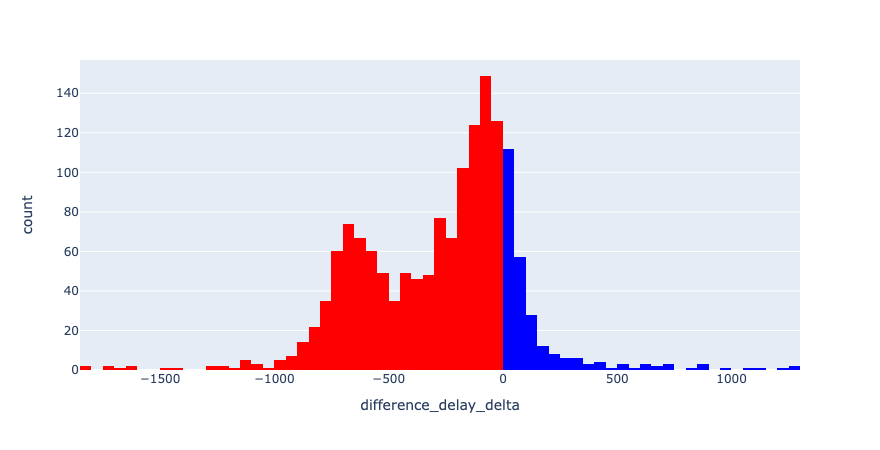

This graph highlights the fact that many customers will not be able to pick up the car they have rented at the time they have chosen. The majority of the rentals are in time even if the checkout is late. 

As we see with the blue bars, a lot of clients will need to wait to get the car they have rented. What's certain is that we need to find a solution to limit delays.

### 2. Pricing

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
data_pricing.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [24]:
data_pricing.shape

(4843, 15)

In [6]:
print(data_pricing.info())
print()
print(data_pricing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

The data seems to be clean, no missing values, some outliers in mileage maybe and aberrant values. I'm not sure a mileage of -64 is possible...

In [7]:
df_pricing = data_pricing.copy()

In [8]:
#Droping Unnamed column
df_pricing.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# removing outliers 3 standard deviations away from mean for mileage and rental price per day
outliers = df_pricing.loc[df_pricing['mileage'] < df_pricing['mileage'].mean() + df_pricing['mileage'].std()*3]
outliers = outliers.loc[outliers['mileage'] > df_pricing['mileage'].mean() - df_pricing['mileage'].std()*3]
outliers = outliers.loc[outliers['rental_price_per_day'] < outliers['rental_price_per_day'].mean() + outliers['rental_price_per_day'].std()*3]
outliers = outliers.loc[outliers['rental_price_per_day'] > outliers['rental_price_per_day'].mean() - outliers['rental_price_per_day'].std()*3]
outliers = outliers.loc[outliers['engine_power'] > outliers['engine_power'].mean() - outliers['engine_power'].std()*3]
df_pricing = outliers.loc[outliers['engine_power'] < outliers['engine_power'].mean() + outliers['engine_power'].std()*3]

In [10]:
df_pricing.to_csv('df_pricing.csv', index=False)

In [29]:
df_pricing.describe()

,mileage,engine_power,rental_price_per_day
count,4670.00,4670.00,4670.00
mean,139374.36,127.13,121.20
std,54298.50,35.13,28.76
min,476.00,25.00,30.00
25%,103330.25,100.00,104.00
50%,140866.50,120.00,119.00
75%,174771.50,135.00,136.00
max,321498.00,240.00,221.00


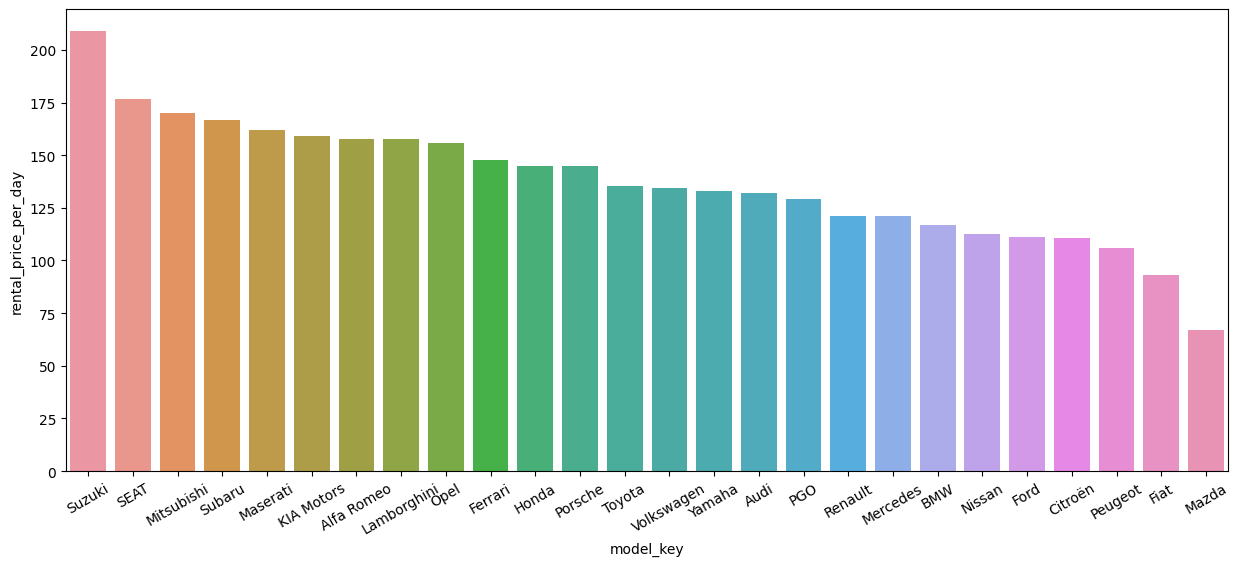

In [30]:
# Visualizing the average rental price by cars
cols = ['mileage','engine_power','rental_price_per_day']
df_model = df_pricing.groupby('model_key')[cols].mean().sort_values(by='rental_price_per_day', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=df_model.index, y=df_model['rental_price_per_day'])
plt.xticks(rotation=30)
plt.show()

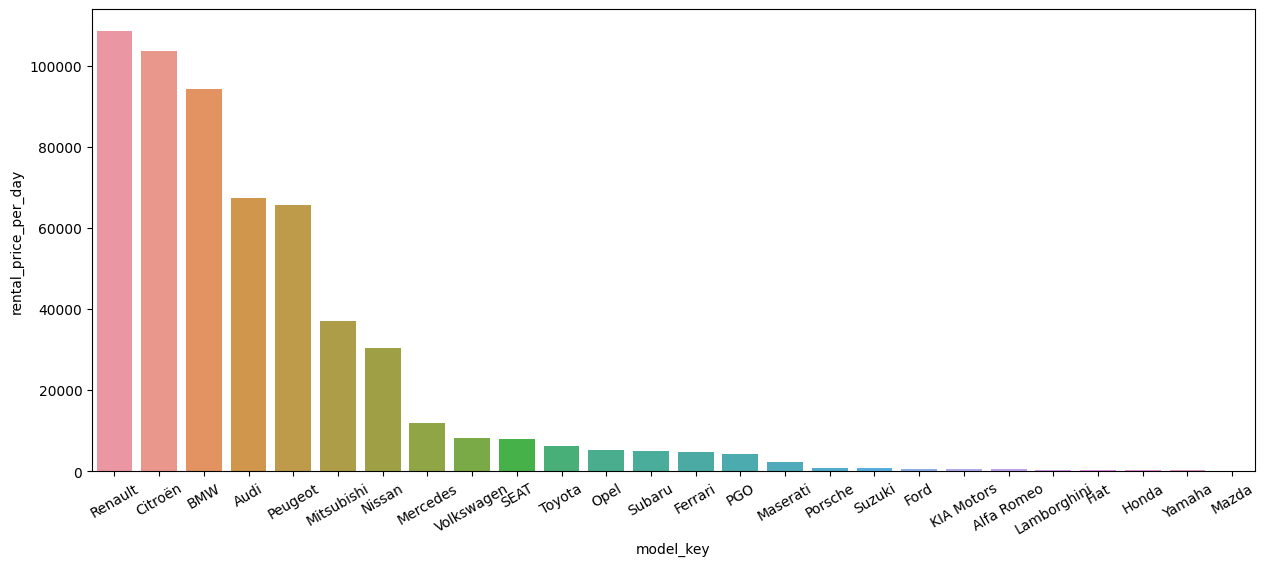

In [31]:
# Visualizing the top brands by total rental price
df_top_models = df_pricing.groupby('model_key')[cols].sum().sort_values(by='rental_price_per_day', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=df_top_models.index, y=df_top_models['rental_price_per_day'])
plt.xticks(rotation=30)
plt.show()

As we see, the top 5 brands are the cheapest on rental price per day, not really surprising. Even if we can be surprised by Suzuki which is the most expensive brand when we take the average rental price per day. Of course the number of cars available by brand is important too, Renault, Citroen etc. are very popular brands

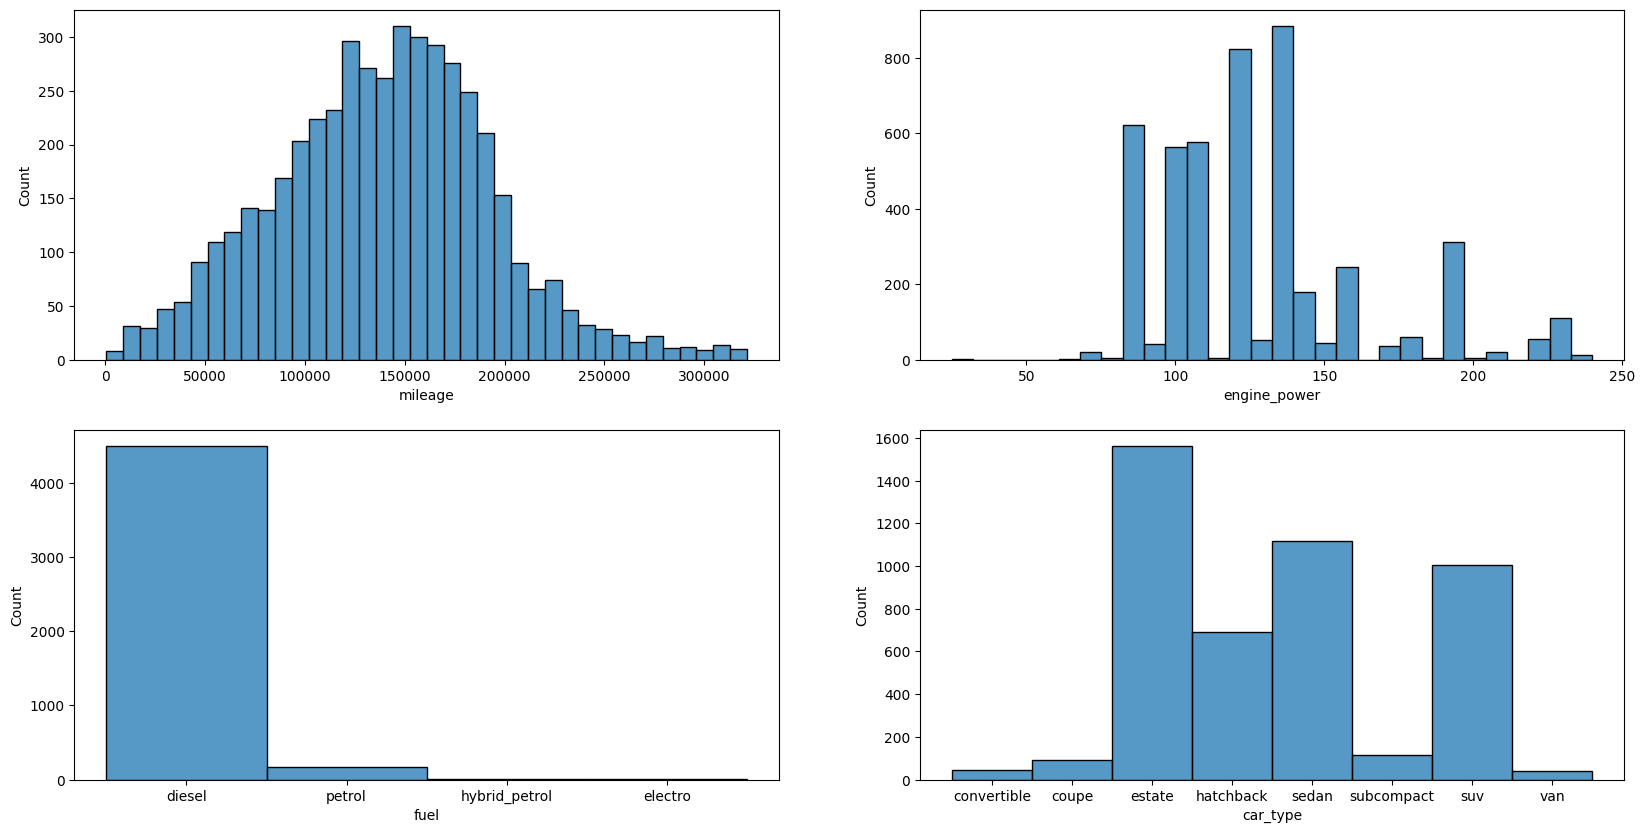

In [32]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(df_pricing, x='mileage')

plt.subplot(2, 2, 2)  # 1 ligne, 2 colonnes, sous-graphique 2
sns.histplot(df_pricing, x='engine_power', bins=30)

plt.subplot(2,2,3)
sns.histplot(df_pricing, x='fuel')

plt.subplot(2,2,4)
sns.histplot(df_pricing, x='car_type')

plt.show()

In [33]:
# Percentage of car with more than 100000 km
mileage_100k = (df_pricing['mileage'] > 100000).mean() * 100
print("percentage of cars above 100000km :", mileage_100k)

# Calculate the percentage of car with less than 10 000km
mileage_less10k = (df_pricing['mileage'] < 10000).mean() * 100
print("percentage of 'new' cars :", mileage_less10k)

percentage of cars above 100000km : 76.74518201284796
percentage of 'new' cars : 0.19271948608137046


In [34]:
fuel = (df_pricing['fuel'] == "diesel").mean() * 100
print("percentage of diesel cars :", fuel)

percentage of diesel cars : 96.27408993576017


. Mileage

77% of the cars have more than 100 000km and only 0.19% are "new" cars.

. Engine power

Most of the cars are between 100 and 150 horse power which is not surprising because this is the common power for a daily car.

. Fuel

96.5% of the cars use diesel. I imagine that the data are from Europe and it is interesting to see that diesel is this much important when we know all the new laws and new rules that makes thermal motor undesirable.

. Car type

Familial cars are the one we find the most in the data. Estate, Sedan and SUV can have different sizes and shapes but in general they have good spaces and are good cars for the road. Maybe less for cities. 

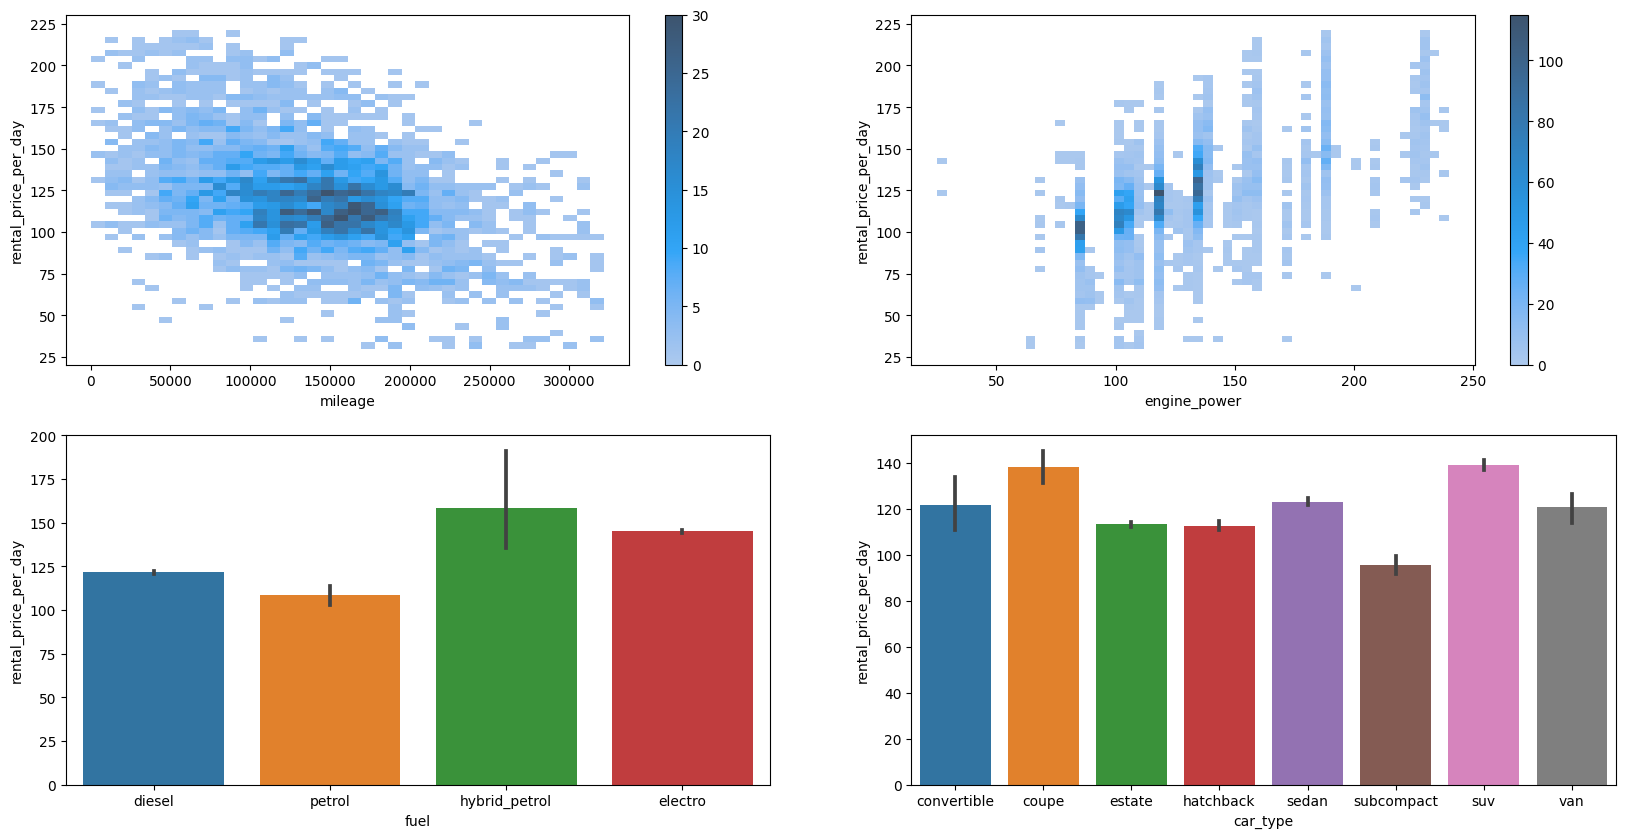

In [35]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(df_pricing, x='mileage', y='rental_price_per_day', cbar=True)

plt.subplot(2, 2, 2)  # 1 ligne, 2 colonnes, sous-graphique 2
sns.histplot(df_pricing, x='engine_power', y='rental_price_per_day', cbar=True)

plt.subplot(2,2,3)
sns.barplot(df_pricing, x='fuel', y='rental_price_per_day')

plt.subplot(2,2,4)
sns.barplot(df_pricing, x='car_type', y='rental_price_per_day')

plt.show()

. Mileage

We can observe that newer cars are more expansive than old cars globally. Most of the rentals are around 100 and 125€ per day.

. Engine power

More the car have power, more the rental price improve. We have probably a good linear relation between price and engine power. 

. Fuel

Not a huge difference between the different fuel solution but still a higher price for hybrid and electric cars. Rather logic when these type of cars cost more than other cars.

. Car type

It's pretty balanced but coupe and SUV have a higher price than other type of cars. Coupe are often sports cars with more power engine so it is understandable and SUV, even if today there are many different ranges, they are mostly premium. 

In [36]:
df_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4670 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4670 non-null   object
 1   mileage                    4670 non-null   int64 
 2   engine_power               4670 non-null   int64 
 3   fuel                       4670 non-null   object
 4   paint_color                4670 non-null   object
 5   car_type                   4670 non-null   object
 6   private_parking_available  4670 non-null   bool  
 7   has_gps                    4670 non-null   bool  
 8   has_air_conditioning       4670 non-null   bool  
 9   automatic_car              4670 non-null   bool  
 10  has_getaround_connect      4670 non-null   bool  
 11  has_speed_regulator        4670 non-null   bool  
 12  winter_tires               4670 non-null   bool  
 13  rental_price_per_day       4670 non-null   int64 
dtypes: bool(7), i

In [37]:
columns = ['private_parking_available','has_gps','has_air_conditioning','automatic_car','has_getaround_connect','has_speed_regulator','winter_tires']
for col in columns:
    if df_pricing[col].dtype == 'bool':
        df_pricing[col] = df_pricing[col].astype(int)

/var/folders/1w/kcwg_s2s1lbg5z722b6bjbk80000gn/T/ipykernel_2797/4099362776.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1w/kcwg_s2s1lbg5z722b6bjbk80000gn/T/ipykernel_2797/4099362776.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1w/kcwg_s2s1lbg5z722b6bjbk80000gn/T/ipykernel_2797/4099362776.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [38]:
df_pricing

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,1,1,0,0,1,1,1,106
2,Citroën,183297,120,diesel,white,convertible,0,0,0,0,1,0,1,101
3,Citroën,128035,135,diesel,red,convertible,1,1,0,0,1,1,1,158
4,Citroën,97097,160,diesel,silver,convertible,1,1,0,0,0,1,1,183
5,Citroën,152352,225,petrol,black,convertible,1,1,0,0,1,1,1,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Toyota,39743,110,diesel,black,van,0,1,0,0,0,0,1,121
4839,Toyota,49832,100,diesel,grey,van,0,1,0,0,0,0,1,132
4840,Toyota,19633,110,diesel,grey,van,0,1,0,0,0,0,1,130
4841,Toyota,27920,110,diesel,brown,van,1,1,0,0,0,0,1,151


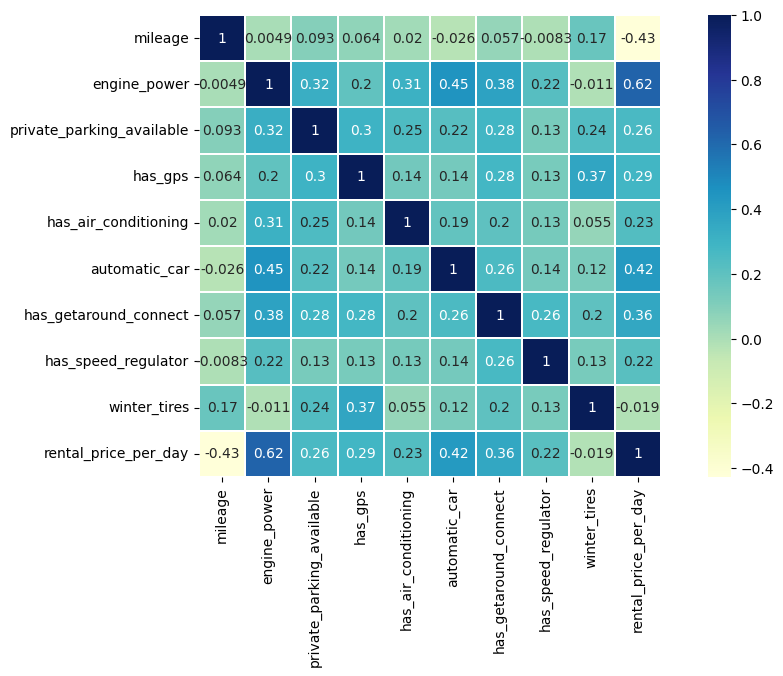

In [39]:
numeric_columns = df_pricing.select_dtypes(include=[np.number])
corr = numeric_columns.corr()


plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.1, square=True)
plt.show()

The informations given by the corr matrix makes sense, more engine power, less mileage and more confort options increase the price of the rental.

### 3. Threshold

In [40]:
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental,delta_time,difference_delay_delta
0,505000,363965,mobile,canceled,NaN,NaN,NA,False,More than 12 hours,NaN
1,507750,269550,mobile,ended,-81.00,NaN,Early,False,More than 12 hours,NaN
2,508131,359049,connect,ended,70.00,NaN,Late 60-120,False,More than 12 hours,NaN
3,508865,299063,connect,canceled,NaN,NaN,NA,False,More than 12 hours,NaN
4,511440,313932,mobile,ended,NaN,NaN,NA,False,More than 12 hours,NaN


In [41]:
df_threshold = df_delay.drop(['rental_id', 'car_id','delta_time'], axis=1)

In [42]:
df_threshold.head()

,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental,difference_delay_delta
0,mobile,canceled,NaN,NaN,NA,False,NaN
1,mobile,ended,-81.00,NaN,Early,False,NaN
2,connect,ended,70.00,NaN,Late 60-120,False,NaN
3,connect,canceled,NaN,NaN,NA,False,NaN
4,mobile,ended,NaN,NaN,NA,False,NaN


In [43]:
df_threshold.isna().sum()

checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
time_delta_with_previous_rental_in_minutes    19257
delay                                             0
next_rental                                       0
difference_delay_delta                        19583
dtype: int64

In [44]:
df_threshold.shape

(21081, 7)

In [45]:
df_threshold.dropna(subset=['delay_at_checkout_in_minutes'], inplace=True)
df_threshold.shape

(16117, 7)

In [46]:
df_threshold['time_delta_with_previous_rental_in_minutes'].fillna(720, inplace=True)
df_threshold['difference_delay_delta'] = df_threshold['delay_at_checkout_in_minutes'] - df_threshold['time_delta_with_previous_rental_in_minutes']
df_threshold.head()

,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental,difference_delay_delta
1,mobile,ended,-81.00,720.00,Early,False,-801.00
2,connect,ended,70.00,720.00,Late 60-120,False,-650.00
5,mobile,ended,-203.00,720.00,Early,False,-923.00
6,connect,ended,-15.00,570.00,Early,True,-585.00
7,mobile,ended,-44.00,720.00,Early,False,-764.00


In [47]:
# calculating the number of late users 
late_users = len(df_threshold[df_threshold['delay_at_checkout_in_minutes'] > 0])
percent_late = late_users/len(df_threshold)*100

print(f"{late_users} of drivers ({round(percent_late,2)}%) make their checkout late")

9216 of drivers (57.18%) make their checkout late


In [48]:
# calculating the number of users impacted by delays
issues = len(df_threshold[df_threshold['difference_delay_delta'] > 0])
issues_percentage = issues/len(df_threshold)*100

print(f"{issues} of drivers ({round(issues_percentage,2)}%) have an issue with the time delta between rentals")
print(f"{len(df_threshold[df_threshold['difference_delay_delta'] > 60])} drivers causing issues are more than 1 hour late")

543 of drivers (3.37%) have an issue with the time delta between rentals
367 drivers causing issues are more than 1 hour late


In [57]:
median_price = df_pricing['rental_price_per_day'].median()

# Number of canceled reservations
canceled = (df_delay['state'] == 'canceled').sum()
loss = canceled*median_price #median price is 119€

print(f"With {canceled} cancellations, we can estimate a loss of {loss}€ for 24h rental")

With 3264 cancellations, we can estimate a loss of 388416.0€ for 24h rental


In [72]:
df_threshold_ = df_threshold[(df_threshold['time_delta_with_previous_rental_in_minutes'] < 120) & (df_threshold['delay_at_checkout_in_minutes'] < 120)]
df_threshold_

,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes,delay,next_rental,difference_delay_delta
74,mobile,ended,-7.00,90.00,Early,True,-97.00
90,mobile,ended,74.00,60.00,Late 60-120,True,14.00
107,mobile,ended,18.00,0.00,Late 15-30,True,18.00
148,mobile,ended,12.00,0.00,Late 0-15,True,12.00
206,mobile,ended,75.00,60.00,Late 60-120,True,15.00
...,...,...,...,...,...,...,...
20924,mobile,ended,11.00,0.00,Late 0-15,True,11.00
21021,connect,ended,17.00,60.00,Late 15-30,True,-43.00
21054,connect,ended,72.00,0.00,Late 60-120,True,72.00
21163,mobile,ended,44.00,0.00,Late 30-60,True,44.00


In [73]:
threshold = len(df_threshold[(df_threshold['time_delta_with_previous_rental_in_minutes'] < 120) & (df_threshold['delay_at_checkout_in_minutes'] < 120)])

print(f"By putting a 120 minutes threshold between two rentals, it could help {threshold} users to get the car they rent in time.")

By putting a 120 minutes threshold between two rentals, it could help 478 users to get the car they rent in time.


### Conclusion

Delays are an important problem for the good of the society and the users satisfaction. Adding a threshold between two rentals seems to be a good solution to limit this problem and avoid cancellation. 120 minutes between two rentals is a good way to begin and see if there is improvement. 